# Analisi della Qualità dell'Aria

In questo notebook esploreremo diverse tecniche non lineari per predire i livelli di inquinamento dell'aria (concentrazione di PM2.5) in base a vari fattori ambientali - RIPRENDIAMO L'ESERCIZIO VISTO IN TEORIA. Vedremo che le relazioni tra le variabili indipendenti e la concentrazione di PM2.5 non sono lineari, quindi dobbiamo utilizzare modelli più complessi rispetto a modelli lineari.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Solo per lo split dei dati
import seaborn as sns

## 2. Caricamento e esplorazione dei dati

Creiamo manualmente il dataset basato sulle informazioni presentate nelle slides.

In [2]:
data = {
    'Temp': [16.24, 33.52, 26.96, 22.96, 9.68, 9.68, 6.74, 30.99, 23.03, 26.24, 
             5.62, 34.1, 29.97, 11.37, 10.45, 10.5, 14.13, 20.74, 17.96, 13.74],
    'Traffic': [325.33, 112.77, 181.47, 214.86, 255.23, 403.33, 139.85, 281.41, 
                316.59, 70.9, 323.4, 126.74, 79.27, 477.0, 484.53, 413.78, 
                187.08, 93.95, 357.9, 248.07],
    'WindSpeed': [1.66, 5.2, 0.83, 9.14, 2.96, 6.79, 3.46, 5.44, 5.69, 2.26, 
                  9.71, 7.86, 9.43, 9.0, 6.18, 9.26, 1.34, 2.36, 0.93, 3.59],
    'PM25': [107.13, 357.41, 245.78, 184.51, 54.7, 51.98, 35.32, 318.36, 187.94, 
             227.3, 34.46, 372.21, 284.47, 66.94, 63.23, 61.92, 84.85, 149.58, 
             127.97, 80.48]
}

In [3]:
# Creazione del DataFrame
df = pd.DataFrame(data)

# Visualizzazione delle prime righe del dataset
print("Prime righe del dataset:")
print(df.head())

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(df.describe())

Prime righe del dataset:
    Temp  Traffic  WindSpeed    PM25
0  16.24   325.33       1.66  107.13
1  33.52   112.77       5.20  357.41
2  26.96   181.47       0.83  245.78
3  22.96   214.86       9.14  184.51
4   9.68   255.23       2.96   54.70

Statistiche descrittive:
            Temp     Traffic  WindSpeed       PM25
count  20.000000   20.000000   20.00000   20.00000
mean   18.731000  254.673000    5.15450  154.82700
std     9.230765  131.030814    3.14231  111.19327
min     5.620000   70.900000    0.83000   34.46000
25%    10.487500  136.572500    2.33500   62.90250
50%    17.100000  251.650000    5.32000  117.55000
75%    26.420000  333.472500    8.14500  231.92000
max    34.100000  484.530000    9.71000  372.21000


STEP 0: QUALE APPROCIO USIAMO? Supervisionato o non supervisionato?

STEP 1: CHE TIPO DI PROBLEMA È? Regressione o classificazione?

STEP 2: DECISIONE DEL MODELLO - esploriamo i dati!

## 3. Analisi esplorativa dei dati

Verifichiamo le relazioni tra le variabili indipendenti e la concentrazione di PM2.5 tramite scatter plot.

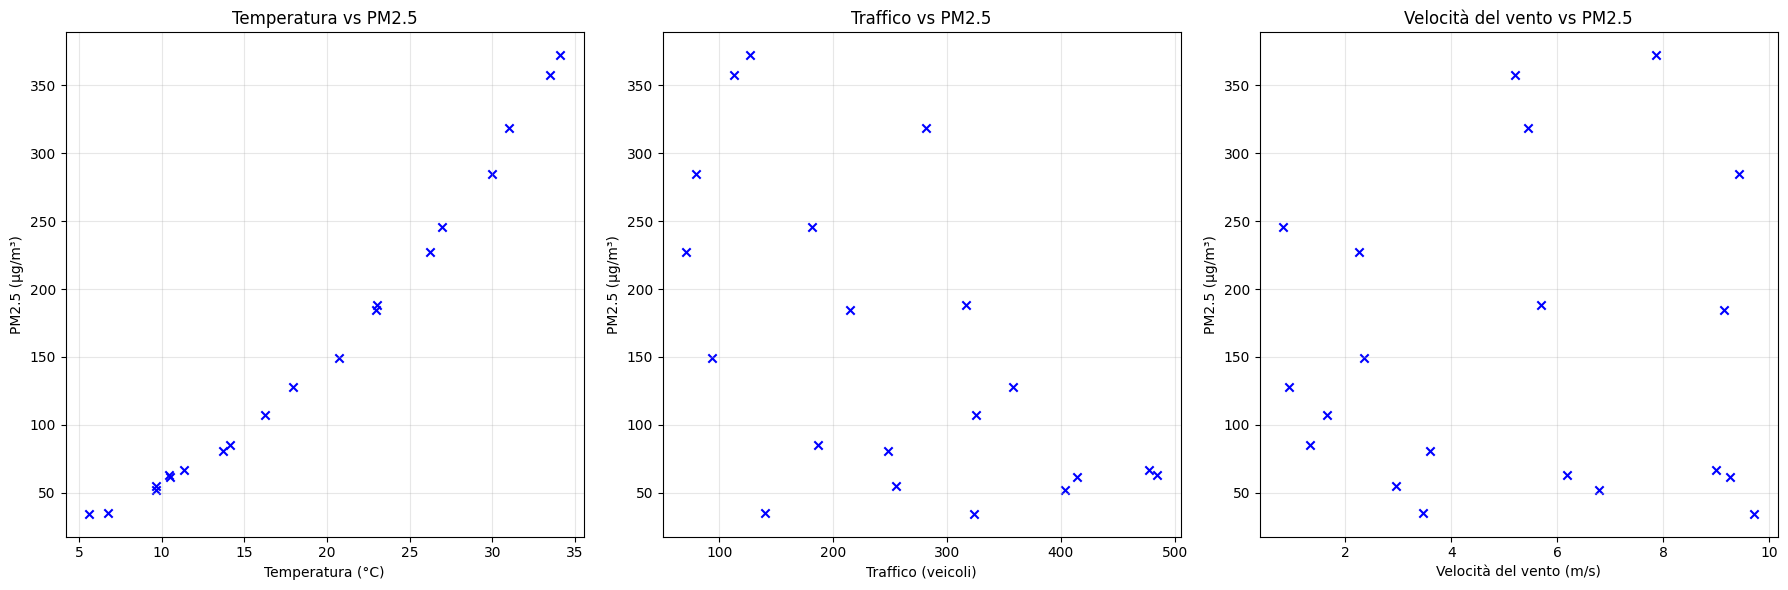

In [4]:
# Creazione di scatter plot per visualizzare le relazioni
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperatura vs PM2.5
axes[0].scatter(df['Temp'], df['PM25'], color='blue', marker='x')
axes[0].set_xlabel('Temperatura (°C)')
axes[0].set_ylabel('PM2.5 (μg/m³)')
axes[0].set_title('Temperatura vs PM2.5')
axes[0].grid(True, alpha=0.3)

# Traffico vs PM2.5
axes[1].scatter(df['Traffic'], df['PM25'], color='blue', marker='x')
axes[1].set_xlabel('Traffico (veicoli)')
axes[1].set_ylabel('PM2.5 (μg/m³)')
axes[1].set_title('Traffico vs PM2.5')
axes[1].grid(True, alpha=0.3)

# Velocità del vento vs PM2.5
axes[2].scatter(df['WindSpeed'], df['PM25'], color='blue', marker='x')
axes[2].set_xlabel('Velocità del vento (m/s)')
axes[2].set_ylabel('PM2.5 (μg/m³)')
axes[2].set_title('Velocità del vento vs PM2.5')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Trasformazioni delle Features

Dall'analisi esplorativa, confermiamo che le relazioni non sono lineari. Proviamo a trasformare le variabili secondo i pattern osservati:

1. Temperatura: relazione quadratica (forma a U)
2. Traffico: relazione logaritmica
3. Velocità del vento: relazione inversa

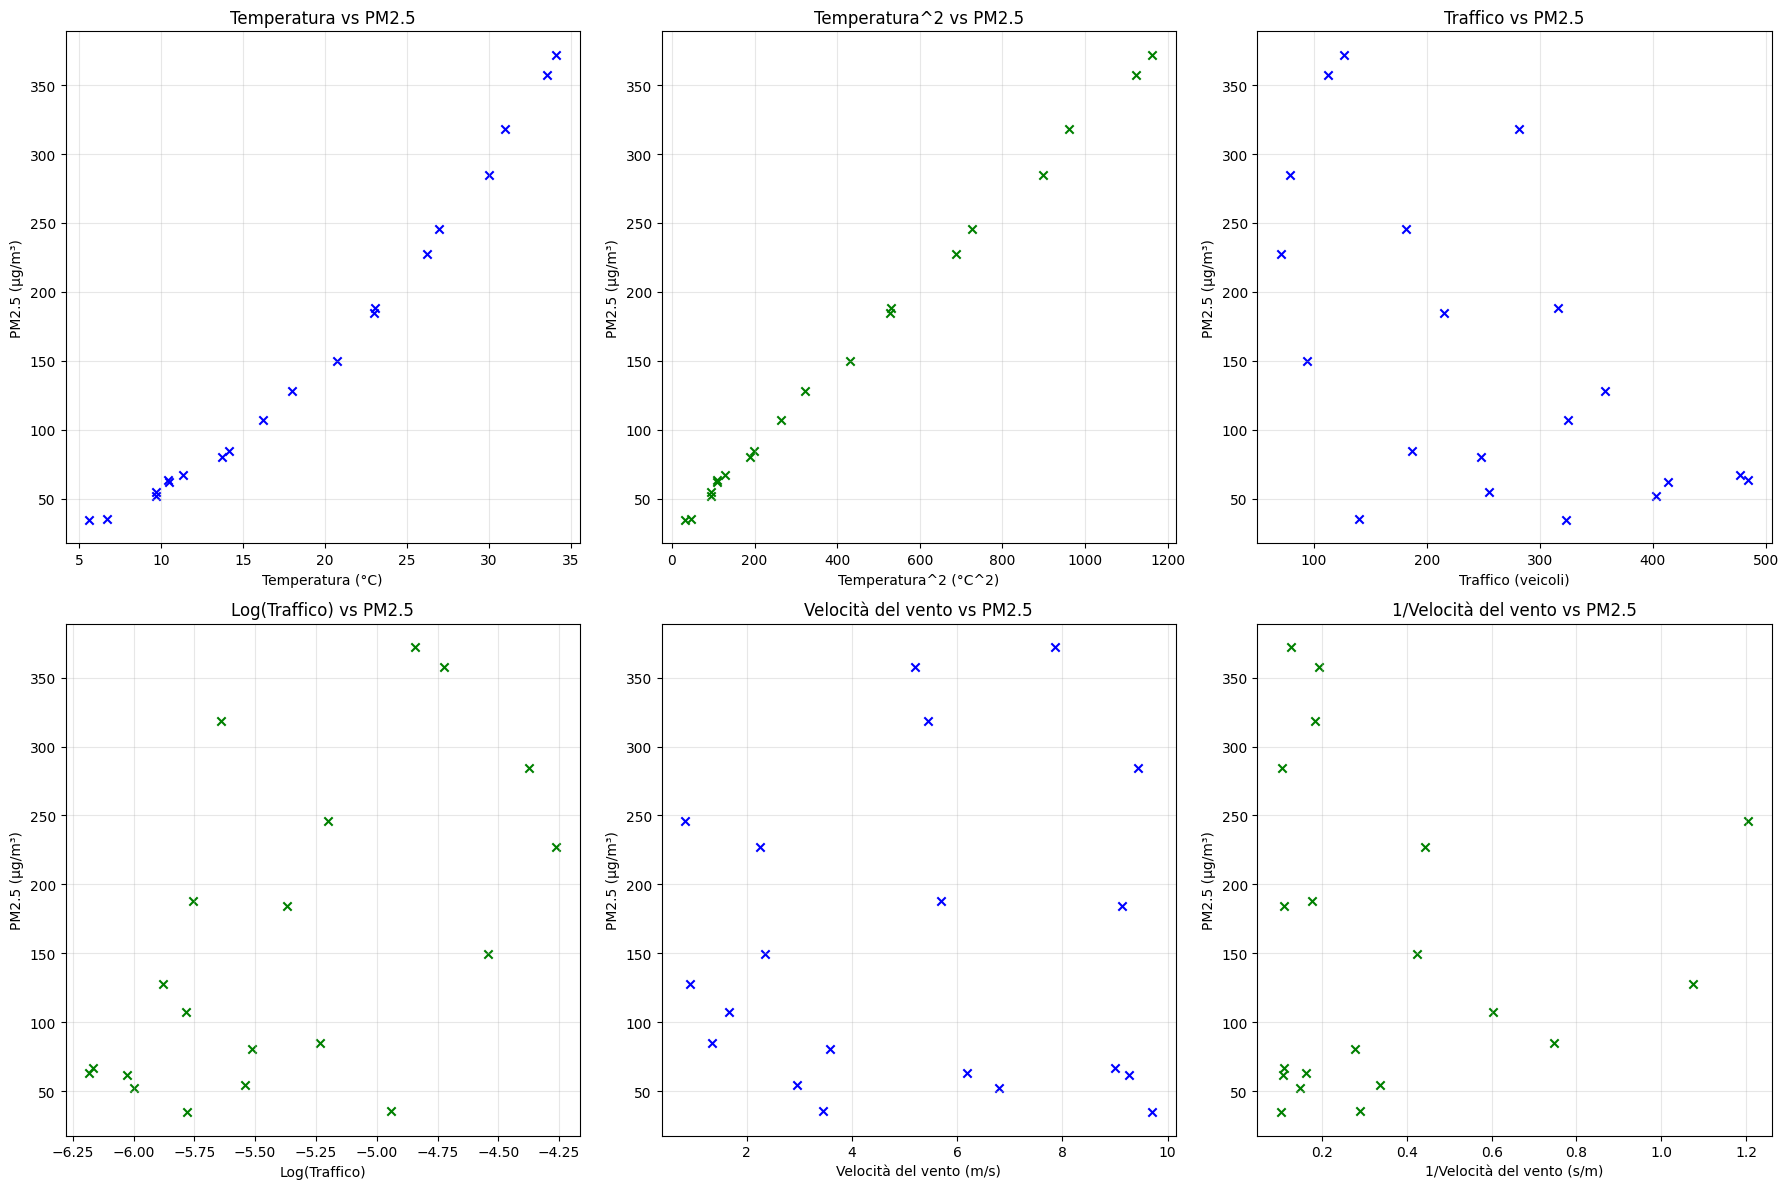

In [5]:
# Aggiungiamo le trasformazioni come nuove colonne
df['Temp_squared'] = df['Temp'] ** 2
df['Log_Traffic'] = (-1)*np.log(df['Traffic'])
df['Inv_WindSpeed'] = 1 / df['WindSpeed']
df['Sqrt_WindSpeed'] = np.sqrt(df['WindSpeed'])

# Visualizziamo le trasformazioni
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Temperatura vs PM2.5
axes[0, 0].scatter(df['Temp'], df['PM25'], color='blue', marker='x')
axes[0, 0].set_xlabel('Temperatura (°C)')
axes[0, 0].set_ylabel('PM2.5 (μg/m³)')
axes[0, 0].set_title('Temperatura vs PM2.5')
axes[0, 0].grid(True, alpha=0.3)

# Temperatura^2 vs PM2.5
axes[0, 1].scatter(df['Temp_squared'], df['PM25'], color='green', marker='x')
axes[0, 1].set_xlabel('Temperatura^2 (°C^2)')
axes[0, 1].set_ylabel('PM2.5 (μg/m³)')
axes[0, 1].set_title('Temperatura^2 vs PM2.5')
axes[0, 1].grid(True, alpha=0.3)

# Traffico vs PM2.5
axes[0, 2].scatter(df['Traffic'], df['PM25'], color='blue', marker='x')
axes[0, 2].set_xlabel('Traffico (veicoli)')
axes[0, 2].set_ylabel('PM2.5 (μg/m³)')
axes[0, 2].set_title('Traffico vs PM2.5')
axes[0, 2].grid(True, alpha=0.3)

# Log(Traffico) vs PM2.5
axes[1, 0].scatter(df['Log_Traffic'], df['PM25'], color='green', marker='x')
axes[1, 0].set_xlabel('Log(Traffico)')
axes[1, 0].set_ylabel('PM2.5 (μg/m³)')
axes[1, 0].set_title('Log(Traffico) vs PM2.5')
axes[1, 0].grid(True, alpha=0.3)

# Velocità del vento vs PM2.5
axes[1, 1].scatter(df['WindSpeed'], df['PM25'], color='blue', marker='x')
axes[1, 1].set_xlabel('Velocità del vento (m/s)')
axes[1, 1].set_ylabel('PM2.5 (μg/m³)')
axes[1, 1].set_title('Velocità del vento vs PM2.5')
axes[1, 1].grid(True, alpha=0.3)

# 1/Velocità del vento vs PM2.5
axes[1, 2].scatter(df['Inv_WindSpeed'], df['PM25'], color='green', marker='x')
axes[1, 2].set_xlabel('1/Velocità del vento (s/m)')
axes[1, 2].set_ylabel('PM2.5 (μg/m³)')
axes[1, 2].set_title('1/Velocità del vento vs PM2.5')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Definizione della classe LogisticRegression da utilizzare
Per la nostra analisi, utilizzeremo una versione modificata della classe `LinearRegression` per adattarla alla regressione non lineare.

In [6]:
class LinearRegression:
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.cost_history = []
    
    def predict(self, X):
        """
        Calcola le previsioni usando il modello lineare y = X*w.
        
        Parametri:
        X -- matrice di input con una colonna di 1 aggiunta per il termine di bias
        
        Restituisce:
        predictions -- vettore delle previsioni
        """
        # Aggiungiamo una colonna di 1 se non è già presente
        if X.shape[1] == len(self.weights) - 1:
            m = X.shape[0]
            X_with_bias = np.c_[np.ones((m, 1)), X]
        else:
            X_with_bias = X
            
        return np.dot(X_with_bias, self.weights)
    
    def compute_cost(self, X, y):
        """
        Calcola la funzione di costo MSE (Mean Squared Error)
        
        Parametri:
        X -- matrice di input con una colonna di 1 aggiunta per il termine di bias
        y -- vettore target
        
        Restituisce:
        cost -- valore dello scarto quadratico medio
        """
        m = X.shape[0]  # numero di esempi
        
        # Calcola le previsioni
        predictions = self.predict(X)
        
        # Calcola la differenza quadratica
        diff = predictions - y
        squared_diff = np.square(diff)
        
        # Calcola la media degli errori quadratici
        cost = (1/(2*m)) * np.sum(squared_diff)
        
        return cost
    
    def compute_gradient(self, X, y):
        """
        Calcola il gradiente della funzione di costo rispetto ai pesi
        
        Parametri:
        X -- matrice di input con una colonna di 1 aggiunta per il termine di bias
        y -- vettore target
        
        Restituisce:
        gradient -- vettore del gradiente
        """
        m = X.shape[0]  # numero di esempi
        
        # Calcola le previsioni
        predictions = self.predict(X)
        
        # Calcola le differenze tra previsioni e valori reali
        diff = predictions - y
        
        # Calcola il gradiente
        gradient = (1/m) * np.dot(X.T, diff)
        
        return gradient
    
    def fit(self, X, y):
        """
        Addestra il modello sui dati usando la discesa del gradiente
        
        Parametri:
        X -- matrice di input
        y -- vettore target
        """
        # Aggiungiamo una colonna di 1 per il termine di bias
        m, n = X.shape
        X_with_bias = np.c_[np.ones((m, 1)), X]
        
        # Inizializziamo i pesi a zero
        self.weights = np.zeros(n + 1)
        
        print("Avvio addestramento...")
        
        for i in range(self.n_iterations):
            # Calcola il gradiente
            gradient = self.compute_gradient(X_with_bias, y)
            
            # Aggiorna i pesi
            self.weights = self.weights - self.learning_rate * gradient
            
            # Calcola e salva il costo per questa iterazione
            cost = self.compute_cost(X_with_bias, y)
            self.cost_history.append(cost)
            
            # Stampa periodica del costo
            if (i % 100 == 0) or (i == self.n_iterations - 1):
                print(f"Iterazione {i}: MSE = {cost:.6f}")
        
        print("Addestramento completato!")
    
    def plot_cost_history(self):
        """
        Visualizza l'andamento della funzione di costo durante l'addestramento
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iterations), self.cost_history)
        plt.xlabel('Iterazioni')
        plt.ylabel('MSE')
        plt.title('Andamento dell\'errore quadratico medio')
        plt.grid(True)
        plt.show()

## 6. Addestramento di modelli lineari su singole feature trasformate
Testiamo l'efficacia di ciascuna trasformazione singolarmente, addestrando modelli di regressione lineare su una feature alla volta.

In [7]:
# Suddivisione in set di training (80%) e test (20%)
X = df[['Temp', 'Traffic', 'WindSpeed']]
y = df['PM25']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Funzione per testare un modello su una singola feature
def test_single_feature(feature_name, X_train_feat, X_test_feat, y_train, y_test, learning_rate=0.01, n_iterations=1000):
    model = LinearRegression(learning_rate=learning_rate, n_iterations=n_iterations)
    model.fit(X_train_feat, y_train)
    
    # Calcolo dell'errore sul training set
    train_pred = model.predict(X_train_feat)
    train_mse = np.mean((train_pred - y_train) ** 2)
    
    # Calcolo dell'errore sul test set
    test_pred = model.predict(X_test_feat)
    test_mse = np.mean((test_pred - y_test) ** 2)
    
    print(f"Feature: {feature_name}")
    print(f"MSE su Training: {train_mse:.2f}")
    print(f"MSE su Test: {test_mse:.2f}")
    
    return model, train_mse, test_mse

# Test per la temperatura originale
print("\nTest per la temperatura (originale)")
X_train_temp = X_train[['Temp']].values
X_test_temp = X_test[['Temp']].values
# Normalizzazione della feature
mean_train = np.mean(X_train_temp)
std_train = np.std(X_train_temp)
X_train_temp = (X_train_temp - mean_train) / std_train
X_test_temp = (X_test_temp - mean_train) / std_train
model_temp, train_mse_temp, test_mse_temp = test_single_feature('Temperatura', X_train_temp, X_test_temp, y_train, y_test, 0.001, 10000)

# Test per la temperatura al quadrato
print("\nTest per la temperatura (quadrato)")
X_train_temp2 = X_train['Temp'].values.reshape(-1, 1) ** 2
X_test_temp2 = X_test['Temp'].values.reshape(-1, 1) ** 2
# Normalizzazione della feature
mean_train = np.mean(X_train_temp2)
std_train = np.std(X_train_temp2)
X_train_temp2 = (X_train_temp2 - mean_train) / std_train
X_test_temp2 = (X_test_temp2 - mean_train) / std_train
model_temp2, train_mse_temp2, test_mse_temp2 = test_single_feature('Temperatura^2', X_train_temp2, X_test_temp2, y_train, y_test, 0.001, 10000)

# Test per il traffico originale
print("\nTest per il traffico (originale)")
X_train_traffic = X_train[['Traffic']].values
X_test_traffic = X_test[['Traffic']].values
# Normalizzazione della feature
mean_train = np.mean(X_train_traffic)
std_train = np.std(X_train_traffic)
X_train_traffic = (X_train_traffic - mean_train) / std_train
X_test_traffic = (X_test_traffic - mean_train) / std_train
model_traffic, train_mse_traffic, test_mse_traffic = test_single_feature('Traffico', X_train_traffic, X_test_traffic, y_train, y_test, 0.001, 10000)

# Test per il logaritmo del traffico
print("\nTest per il traffico (logaritmo)")
X_train_log_traffic = (-1)*np.log(X_train[['Traffic']].values)
X_test_log_traffic = (-1)*np.log(X_test[['Traffic']].values)
# Normalizzazione della feature
mean_train = np.mean(X_train_log_traffic)
std_train = np.std(X_train_log_traffic)
X_train_log_traffic = (X_train_log_traffic - mean_train) / std_train
X_test_log_traffic = (X_test_log_traffic - mean_train) / std_train
model_log_traffic, train_mse_log_traffic, test_mse_log_traffic = test_single_feature('-Log(Traffico)', X_train_log_traffic, X_test_log_traffic, y_train, y_test, 0.001, 10000)

# Test per la velocità del vento originale
print("\nTest per la velocità del vento (originale)")
X_train_wind = X_train[['WindSpeed']].values
X_test_wind = X_test[['WindSpeed']].values
# Normalizzazione della feature
mean_train = np.mean(X_train_wind)
std_train = np.std(X_train_wind)
X_train_wind = (X_train_wind - mean_train) / std_train
X_test_wind = (X_test_wind - mean_train) / std_train
model_wind, train_mse_wind, test_mse_wind = test_single_feature('Velocità del vento', X_train_wind, X_test_wind, y_train, y_test, 0.001, 10000)

# Test per l'inverso della velocità del vento
print("\nTest per la velocità del vento (inverso)")
X_train_inv_wind = 1 / X_train[['WindSpeed']].values
X_test_inv_wind = 1 / X_test[['WindSpeed']].values
# Normalizzazione della feature
mean_train = np.mean(X_train_inv_wind)
std_train = np.std(X_train_inv_wind)
X_train_inv_wind = (X_train_inv_wind - mean_train) / std_train
X_test_inv_wind = (X_test_inv_wind - mean_train) / std_train
model_inv_wind, train_mse_inv_wind, test_mse_inv_wind = test_single_feature('1/Velocità del vento', X_train_inv_wind, X_test_inv_wind, y_train, y_test, 0.001, 10000)

# Riepilogo dei risultati
results = [
    ['Temperatura', train_mse_temp, test_mse_temp],
    ['Temperatura^2', train_mse_temp2, test_mse_temp2],
    ['Traffico', train_mse_traffic, test_mse_traffic],
    ['-Log(Traffico)', train_mse_log_traffic, test_mse_log_traffic],
    ['Velocità del vento', train_mse_wind, test_mse_wind],
    ['1/Velocità del vento', train_mse_inv_wind, test_mse_inv_wind]
]

results_df = pd.DataFrame(results, columns=['Feature', 'Training MSE', 'Test MSE'])
print("\nRiepilogo dei risultati (ordinati per MSE sul test):")
print(results_df.sort_values('Test MSE'))


Test per la temperatura (originale)
Avvio addestramento...
Iterazione 0: MSE = 17119.655396
Iterazione 100: MSE = 14044.311920
Iterazione 200: MSE = 11526.685583
Iterazione 300: MSE = 9465.633729
Iterazione 400: MSE = 7778.356041
Iterazione 500: MSE = 6397.068137
Iterazione 600: MSE = 5266.278411
Iterazione 700: MSE = 4340.558726
Iterazione 800: MSE = 3582.719389
Iterazione 900: MSE = 2962.315103
Iterazione 1000: MSE = 2454.421861
Iterazione 1100: MSE = 2038.635652
Iterazione 1200: MSE = 1698.252759
Iterazione 1300: MSE = 1419.598702
Iterazione 1400: MSE = 1191.478885
Iterazione 1500: MSE = 1004.728863
Iterazione 1600: MSE = 851.846176
Iterazione 1700: MSE = 726.688944
Iterazione 1800: MSE = 624.229122
Iterazione 1900: MSE = 540.350509
Iterazione 2000: MSE = 471.683381
Iterazione 2100: MSE = 415.469116
Iterazione 2200: MSE = 369.449374
Iterazione 2300: MSE = 331.775367
Iterazione 2400: MSE = 300.933584
Iterazione 2500: MSE = 275.684995
Iterazione 2600: MSE = 255.015268
Iterazione 2700

## 7. Classe per la regressione non lineare

Ora implementiamo una classe specializzata per la regressione non lineare che applica automaticamente le trasformazioni alle feature.

In [8]:
class NonLinearRegression:
    """
    Implementazione della regressione non lineare attraverso trasformazioni delle feature.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.linear_model = LinearRegression(learning_rate, n_iterations)
        self.transformations = {}
    
    def add_transformation(self, feature_name, transformation_func):
        """
        Aggiunge una trasformazione per una feature
        
        Parametri:
        feature_name: nome della feature da trasformare
        transformation_func: funzione che implementa la trasformazione
        """
        self.transformations[feature_name] = transformation_func
    
    def transform_features(self, X):
        """
        Applica le trasformazioni alle feature
        
        Parametri:
        X: DataFrame delle feature originali
        
        Restituisce:
        transformed_X: array numpy con le feature trasformate
        """
        # Inizializziamo una lista vuota per le colonne trasformate
        transformed_columns = []
        
        # Per ogni colonna nel DataFrame
        for col in X.columns:
            if col in self.transformations:
                # Se esiste una trasformazione, la applichiamo
                transformed_col = self.transformations[col](X[col].values)
                transformed_columns.append(transformed_col.reshape(-1, 1))
            else:
                # Altrimenti usiamo la colonna originale
                transformed_columns.append(X[col].values.reshape(-1, 1))
        
        # Concateniamo tutte le colonne trasformate
        transformed_X = np.hstack(transformed_columns)
        return transformed_X
    
    def fit(self, X, y):
        """
        Addestra il modello non lineare
        
        Parametri:
        X: DataFrame delle feature originali
        y: Serie o array degli obiettivi
        """
        # Applichiamo le trasformazioni alle feature
        X_transformed = self.transform_features(X)
        
        # Addestriamo il modello lineare sulle feature trasformate
        self.linear_model.fit(X_transformed, y)
    
    def predict(self, X):
        """
        Genera predizioni utilizzando il modello addestrato
        
        Parametri:
        X: DataFrame delle feature originali
        
        Restituisce:
        predictions: array delle predizioni
        """
        # Applichiamo le trasformazioni alle feature
        X_transformed = self.transform_features(X)
        
        # Utilizziamo il modello lineare per generare le predizioni
        return self.linear_model.predict(X_transformed)
    
    def compute_mse(self, X, y):
        """
        Calcola l'errore quadratico medio
        
        Parametri:
        X: DataFrame delle feature originali
        y: Serie o array degli obiettivi reali
        
        Restituisce:
        mse: Mean Squared Error
        """
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        return mse
    
    def plot_cost_history(self):
        """
        Visualizza l'andamento dell'errore durante l'addestramento
        """
        self.linear_model.plot_cost_history()

## 8. Applicazione del modello non lineare con le migliori trasformazioni e normalizzazione
Sulla base dell'analisi precedente, utilizziamo le migliori trasformazioni per ciascuna feature e applichiamo anche la normalizzazione per mantenere coerenza con i test precedenti.

In [9]:
class NormalizedNonLinearRegression(NonLinearRegression):
    """
    Estensione della classe NonLinearRegression che include la normalizzazione delle feature.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        super().__init__(learning_rate, n_iterations)
        self.means = {}
        self.stds = {}
    
    def transform_features(self, X):
        """
        Applica le trasformazioni e la normalizzazione alle feature
        
        Parametri:
        X: DataFrame delle feature originali
        
        Restituisce:
        transformed_X: array numpy con le feature trasformate e normalizzate
        """
        # Inizializziamo una lista vuota per le colonne trasformate
        transformed_columns = []
        
        # Per ogni colonna nel DataFrame
        for col in X.columns:
            if col in self.transformations:
                # Se esiste una trasformazione, la applichiamo
                transformed_col = self.transformations[col](X[col].values)
                transformed_col = transformed_col.reshape(-1, 1)
                
                # Applichiamo la normalizzazione se abbiamo calcolato media e deviazione standard
                if col in self.means and col in self.stds:
                    transformed_col = (transformed_col - self.means[col]) / self.stds[col]
                
                transformed_columns.append(transformed_col)
            else:
                # Altrimenti usiamo la colonna originale
                original_col = X[col].values.reshape(-1, 1)
                
                # Applichiamo la normalizzazione se abbiamo calcolato media e deviazione standard
                if col in self.means and col in self.stds:
                    original_col = (original_col - self.means[col]) / self.stds[col]
                
                transformed_columns.append(original_col)
        
        # Concateniamo tutte le colonne trasformate
        transformed_X = np.hstack(transformed_columns)
        return transformed_X
    
    def fit(self, X, y):
        """
        Addestra il modello non lineare, calcolando prima le statistiche per la normalizzazione
        
        Parametri:
        X: DataFrame delle feature originali
        y: Serie o array degli obiettivi
        """
        # Calcoliamo media e deviazione standard per ogni feature trasformata
        for col in X.columns:
            if col in self.transformations:
                transformed_col = self.transformations[col](X[col].values)
                self.means[col] = np.mean(transformed_col)
                self.stds[col] = np.std(transformed_col)
            else:
                self.means[col] = np.mean(X[col].values)
                self.stds[col] = np.std(X[col].values)
        
        # Addestriamo il modello lineare sulle feature trasformate e normalizzate
        X_transformed = self.transform_features(X)
        self.linear_model.fit(X_transformed, y)

Avvio addestramento...
Iterazione 0: MSE = 17116.030933
Iterazione 100: MSE = 13771.558502
Iterazione 200: MSE = 11123.861544
Iterazione 300: MSE = 9020.106405
Iterazione 400: MSE = 7342.500389
Iterazione 500: MSE = 5999.944243
Iterazione 600: MSE = 4921.737931
Iterazione 700: MSE = 4052.821524
Iterazione 800: MSE = 3350.166394
Iterazione 900: MSE = 2780.030437
Iterazione 1000: MSE = 2315.863954
Iterazione 1100: MSE = 1936.706819
Iterazione 1200: MSE = 1625.957658
Iterazione 1300: MSE = 1370.425549
Iterazione 1400: MSE = 1159.596928
Iterazione 1500: MSE = 985.066941
Iterazione 1600: MSE = 840.096886
Iterazione 1700: MSE = 719.268611
Iterazione 1800: MSE = 618.213747
Iterazione 1900: MSE = 533.400889
Iterazione 2000: MSE = 461.967782
Iterazione 2100: MSE = 401.588606
Iterazione 2200: MSE = 350.368689
Iterazione 2300: MSE = 306.760759
Iterazione 2400: MSE = 269.498132
Iterazione 2500: MSE = 237.541280
Iterazione 2600: MSE = 210.034985
Iterazione 2700: MSE = 186.273909
Iterazione 2800: MS

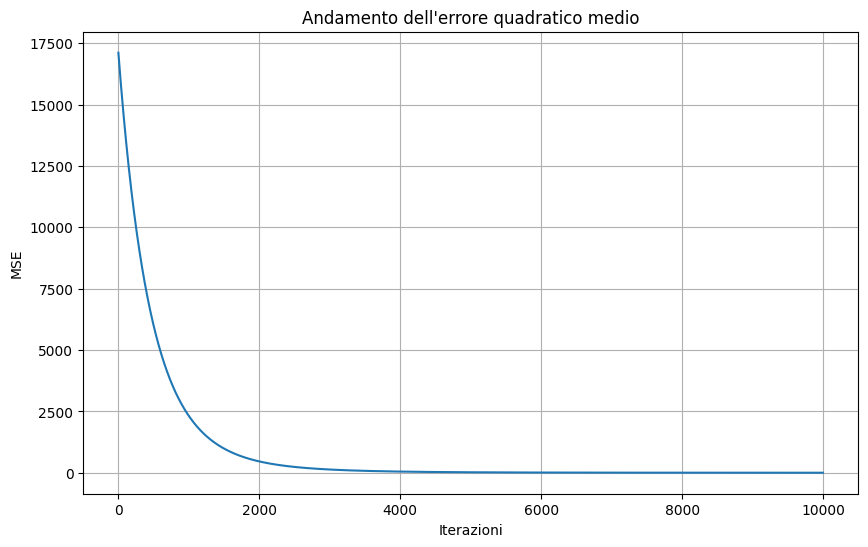

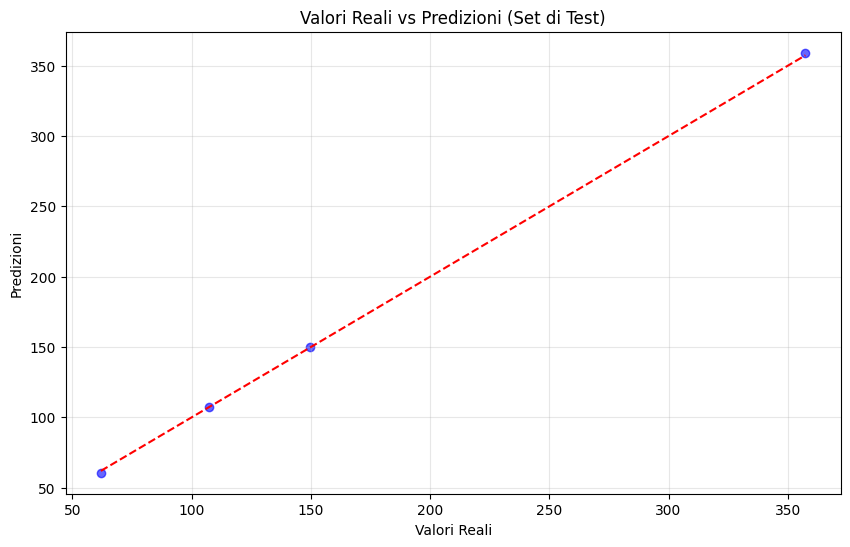

In [10]:
# Creiamo e configuriamo il modello non lineare normalizzato
model = NormalizedNonLinearRegression(learning_rate=0.001, n_iterations=10000)

# Aggiungiamo le migliori trasformazioni individuate
model.add_transformation('Temp', lambda x: x ** 2)  # Temperatura al quadrato
model.add_transformation('Traffic', lambda x: -np.log(x))  # Logaritmo del traffico
model.add_transformation('WindSpeed', lambda x: 1 / x)  # Inverso della velocità del vento

# Addestriamo il modello
model.fit(X_train, y_train)

# Valutiamo le performance
train_mse = model.compute_mse(X_train, y_train)
test_mse = model.compute_mse(X_test, y_test)

print("\nRisultati del modello non lineare con le migliori trasformazioni e normalizzazione:")
print(f"MSE su Training: {train_mse:.2f}")
print(f"MSE su Test: {test_mse:.2f}")

# Visualizziamo l'andamento del costo durante l'addestramento
model.plot_cost_history()

# Confrontiamo le predizioni con i valori reali
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valori Reali')
plt.ylabel('Predizioni')
plt.title('Valori Reali vs Predizioni (Set di Test)')
plt.grid(True, alpha=0.3)
plt.show()


## 9. Modello con tutte le combinazioni di trasformazioni

Proviamo ora a creare un modello più complesso che includa tutte le combinazioni polinomiali delle feature fino a un certo grado, applicando anche la normalizzazione per coerenza con gli altri modelli testati.

In [11]:
def create_polynomial_features(X, degree=2):
    """
    Crea combinazioni polinomiali delle feature fino a un certo grado
    
    Parametri:
    X: matrice delle feature originali
    degree: grado massimo del polinomio
    
    Restituisce:
    X_poly: matrice delle feature polinomiali
    """
    m, n = X.shape
    feature_names = []
    feature_array = []
    
    for d in range(1, degree + 1):
        for i in range(n):
            for j in range(i, n):
                if i == j:  # Potenze
                    if d > 1:  # Solo potenze > 1
                        feature = X[:, i] ** d
                        feature_array.append(feature.reshape(-1, 1))
                        feature_names.append(f"X{i}^{d}")
                else:  # Prodotti incrociati
                    if d == 2:  # Solo per grado 2
                        feature = X[:, i] * X[:, j]
                        feature_array.append(feature.reshape(-1, 1))
                        feature_names.append(f"X{i}*X{j}")
    
    # Aggiungiamo le feature originali
    for i in range(n):
        feature_array.append(X[:, i].reshape(-1, 1))
        feature_names.append(f"X{i}")
    
    # Combinare tutte le feature
    X_poly = np.hstack(feature_array)
    
    return X_poly, feature_names

Avvio addestramento...
Iterazione 0: MSE = 17093.102384
Iterazione 100: MSE = 12332.949330
Iterazione 200: MSE = 9298.625919
Iterazione 300: MSE = 7231.263537
Iterazione 400: MSE = 5741.711585
Iterazione 500: MSE = 4622.020977
Iterazione 600: MSE = 3754.952975
Iterazione 700: MSE = 3070.070928
Iterazione 800: MSE = 2522.107429
Iterazione 900: MSE = 2080.071702
Iterazione 1000: MSE = 1721.594309
Iterazione 1100: MSE = 1429.866424
Iterazione 1200: MSE = 1191.893436
Iterazione 1300: MSE = 997.435272
Iterazione 1400: MSE = 838.320765
Iterazione 1500: MSE = 707.976643
Iterazione 1600: MSE = 601.087360
Iterazione 1700: MSE = 513.339786
Iterazione 1800: MSE = 441.226281
Iterazione 1900: MSE = 381.889900
Iterazione 2000: MSE = 333.001201
Iterazione 2100: MSE = 292.659374
Iterazione 2200: MSE = 259.312469
Iterazione 2300: MSE = 231.692792
Iterazione 2400: MSE = 208.764457
Iterazione 2500: MSE = 189.680731
Iterazione 2600: MSE = 173.749311
Iterazione 2700: MSE = 160.404013
Iterazione 2800: MSE =

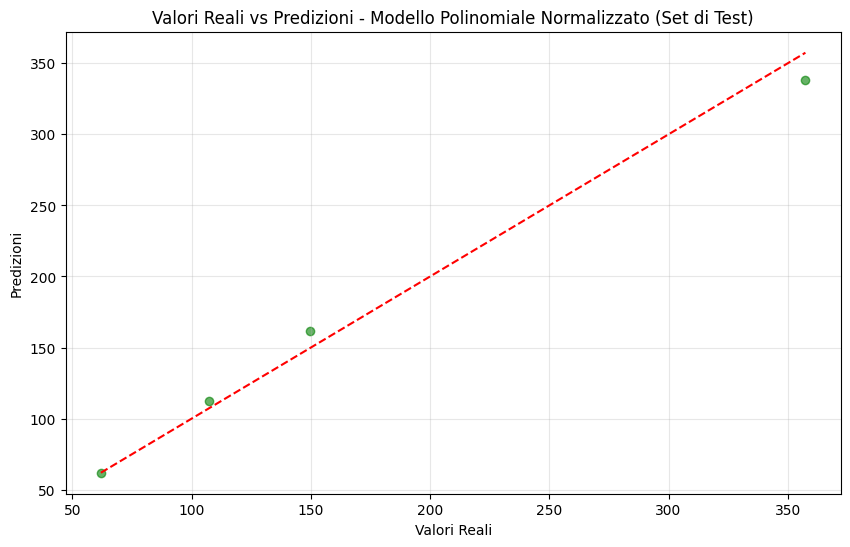


Top 10 feature più importanti:
  Feature  Coefficiente  Importanza Assoluta
0    X0^2     54.041757            54.041757
6      X0     40.316346            40.316346
7      X1     -8.013726             8.013726
2   X0*X2      7.757446             7.757446
1   X0*X1      7.503838             7.503838
4   X1*X2      2.012736             2.012736
8      X2     -1.325207             1.325207
5    X2^2     -0.619682             0.619682
3    X1^2      0.043347             0.043347


In [12]:
# Utilizziamo le feature originali e creiamo le combinazioni polinomiali
X_train_array = X_train.values
X_test_array = X_test.values

# Creiamo le feature polinomiali
X_train_poly, feature_names = create_polynomial_features(X_train_array, degree=2)
X_test_poly, _ = create_polynomial_features(X_test_array, degree=2)

# Normalizziamo le feature polinomiali
mean_poly = np.mean(X_train_poly, axis=0)
std_poly = np.std(X_train_poly, axis=0)

# Gestiamo il caso di deviazione standard = 0
std_poly[std_poly == 0] = 1

# Applichiamo la normalizzazione
X_train_poly_norm = (X_train_poly - mean_poly) / std_poly
X_test_poly_norm = (X_test_poly - mean_poly) / std_poly

# Addestriamo un modello lineare sulle feature polinomiali normalizzate
poly_model = LinearRegression(learning_rate=0.001, n_iterations=10000)
poly_model.fit(X_train_poly_norm, y_train)

# Valutiamo le performance
y_train_pred_poly = poly_model.predict(X_train_poly_norm)
y_test_pred_poly = poly_model.predict(X_test_poly_norm)

train_mse_poly = np.mean((y_train_pred_poly - y_train) ** 2)
test_mse_poly = np.mean((y_test_pred_poly - y_test) ** 2)

print("\nRisultati del modello polinomiale normalizzato (grado 2):")
print(f"MSE su Training: {train_mse_poly:.2f}")
print(f"MSE su Test: {test_mse_poly:.2f}")

# Visualizziamo le predizioni vs i valori reali
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_poly, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valori Reali')
plt.ylabel('Predizioni')
plt.title('Valori Reali vs Predizioni - Modello Polinomiale Normalizzato (Set di Test)')
plt.grid(True, alpha=0.3)
plt.show()

# Calcoliamo e visualizziamo i pesi normalizzati del modello per capire quali feature sono più importanti
weights = poly_model.weights[1:]  # Escludiamo il bias
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficiente': weights,
    'Importanza Assoluta': np.abs(weights)
})

print("\nTop 10 feature più importanti:")
print(feature_importance.sort_values('Importanza Assoluta', ascending=False).head(10))

## 10. Confronto finale dei modelli
Confrontiamo tutti i modelli addestrati per identificare il migliore.


Confronto finale dei modelli (ordinati per MSE sul test):
                   Modello  Training MSE      Test MSE
6  Migliori Trasformazioni      3.573485      1.301231
1            Temperatura^2     15.723263     12.101442
7      Modello Polinomiale     85.144579    133.653512
0              Temperatura    323.417544    541.540500
2                 Traffico   8220.074825   6495.023134
3           -Log(Traffico)   8112.302115   6857.924494
5     1/Velocità del vento  11408.080223  13229.308483
4       Velocità del vento  11317.320925  13556.190158


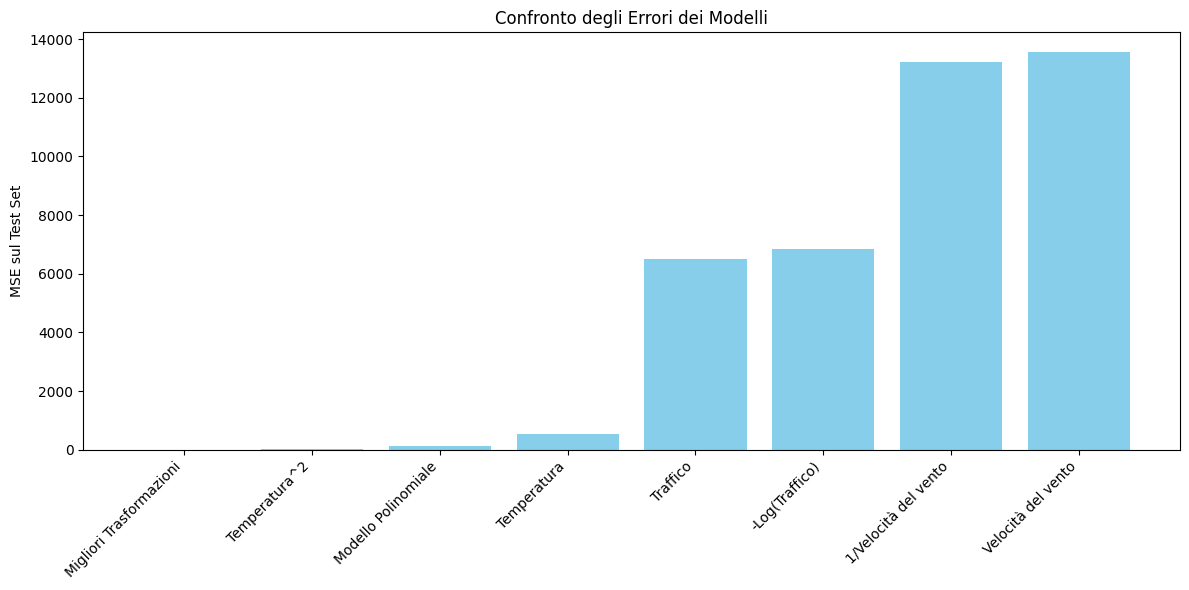

In [13]:
results.append(['Migliori Trasformazioni', train_mse, test_mse])
results.append(['Modello Polinomiale', train_mse_poly, test_mse_poly])

final_results = pd.DataFrame(results, columns=['Modello', 'Training MSE', 'Test MSE'])
final_results = final_results.sort_values('Test MSE')

print("\nConfronto finale dei modelli (ordinati per MSE sul test):")
print(final_results)

# Visualizziamo i risultati
plt.figure(figsize=(12, 6))
plt.bar(final_results['Modello'], final_results['Test MSE'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE sul Test Set')
plt.title('Confronto degli Errori dei Modelli')
plt.tight_layout()
plt.show()


Metriche per il modello: Temperatura
RMSE: 23.27
R^2: 0.96
MAE: 20.24

Metriche per il modello: Temperatura^2
RMSE: 3.48
R^2: 1.00
MAE: 3.31

Metriche per il modello: Traffico
RMSE: 80.59
R^2: 0.49
MAE: 62.48

Metriche per il modello: -Log(Traffico)
RMSE: 82.81
R^2: 0.46
MAE: 65.14

Metriche per il modello: Velocità del vento
RMSE: 116.43
R^2: -0.06
MAE: 87.28

Metriche per il modello: 1/Velocità del vento
RMSE: 115.02
R^2: -0.03
MAE: 85.98

Metriche per il modello: Migliori Trasformazioni
RMSE: 1.14
R^2: 1.00
MAE: 0.89

Metriche per il modello: Modello Polinomiale
RMSE: 11.56
R^2: 0.99
MAE: 9.12

Confronto delle metriche dei modelli:
                   Modello        RMSE       R^2        MAE
6  Migliori Trasformazioni    1.140715  0.999898   0.890406
1            Temperatura^2    3.478713  0.999054   3.313736
7      Modello Polinomiale   11.560861  0.989552   9.121034
0              Temperatura   23.271023  0.957667  20.242428
2                 Traffico   80.591706  0.492274  62.475

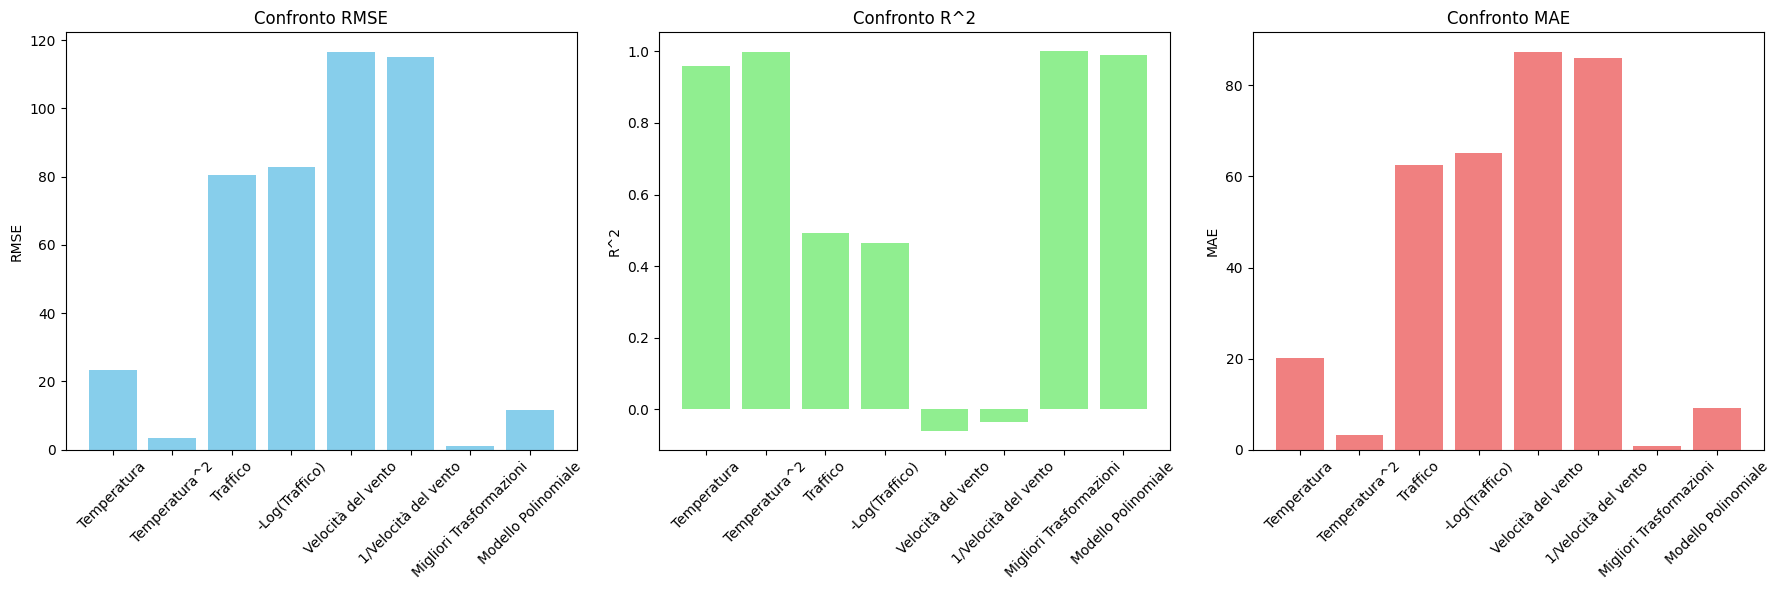

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Funzione per calcolare e stampare le metriche
def calculate_metrics(y_true, y_pred, model_name):
    """
    Calcola RMSE, R^2 e MAE e stampa i risultati.
    
    Parametri:
    y_true: valori reali
    y_pred: valori predetti
    model_name: nome del modello
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\nMetriche per il modello: {model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    
    return rmse, r2, mae

# Calcola le metriche per ogni modello
model_names = [
    'Temperatura',
    'Temperatura^2',
    'Traffico',
    '-Log(Traffico)',
    'Velocità del vento',
    '1/Velocità del vento',
    'Migliori Trasformazioni',
    'Modello Polinomiale'
]

# Predizioni dei modelli (assicurati che siano nello stesso ordine di model_names)
y_pred_temp = model_temp.predict(X_test_temp)
y_pred_temp2 = model_temp2.predict(X_test_temp2)
y_pred_traffic = model_traffic.predict(X_test_traffic)
y_pred_log_traffic = model_log_traffic.predict(X_test_log_traffic)
y_pred_wind = model_wind.predict(X_test_wind)
y_pred_inv_wind = model_inv_wind.predict(X_test_inv_wind)
y_pred_best_transformations = model.predict(X_test)
y_pred_poly = poly_model.predict(X_test_poly_norm)

y_preds = [
    y_pred_temp,
    y_pred_temp2,
    y_pred_traffic,
    y_pred_log_traffic,
    y_pred_wind,
    y_pred_inv_wind,
    y_pred_best_transformations,
    y_pred_poly
]

metrics = []
for i, name in enumerate(model_names):
    rmse, r2, mae = calculate_metrics(y_test, y_preds[i], name)
    metrics.append([name, rmse, r2, mae])

# Crea un DataFrame per confrontare le metriche
metrics_df = pd.DataFrame(metrics, columns=['Modello', 'RMSE', 'R^2', 'MAE'])
print("\nConfronto delle metriche dei modelli:")
print(metrics_df.sort_values('RMSE'))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RMSE
axes[0].bar(metrics_df['Modello'], metrics_df['RMSE'], color='skyblue')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Confronto RMSE')
axes[0].tick_params(axis='x', rotation=45)  # Removed 'ha'

# R^2
axes[1].bar(metrics_df['Modello'], metrics_df['R^2'], color='lightgreen')
axes[1].set_ylabel('R^2')
axes[1].set_title('Confronto R^2')
axes[1].tick_params(axis='x', rotation=45)  # Removed 'ha'

# MAE
axes[2].bar(metrics_df['Modello'], metrics_df['MAE'], color='lightcoral')
axes[2].set_ylabel('MAE')
axes[2].set_title('Confronto MAE')
axes[2].tick_params(axis='x', rotation=45)  # Removed 'ha'

plt.tight_layout()
plt.show()